# Review: Programming Exercise 07

## Traffic Flow (MAXIMUM Spanning Tree)

Prim's MST Algorithm for reference
```
def prim(graph:list)->list:
    mst = []
    for i in range(len(graph)):
        mst.append(GraphVertex(i))
    v = graph[0] #start
    while not v.intree:
        v.intree = True
        for e in v.edges:
            if not e.destination.intree:
                if e.destination.candidate is None or e.destination.candidate.weight > e.weight:
                    e.destination.candidate = e
                    e.destination.parent = v
        dist = float('inf')
        mst_edge = None
        for i in graph:
            if not i.intree and i.candidate is not None and dist > i.candidate.weight:
                dist = i.candidate.weight
                mst_edge = i.candidate
        if mst_edge is not None: #put edge into mst graph
            s = mst_edge.source.label
            d = mst_edge.destination.label
            w = mst_edge.weight
            mst[s].edges.append(GraphEdge(mst[s],mst[d], w))
            mst[d].edges.append(GraphEdge(mst[d],mst[s], w)) #undirected graph
            v = mst_edge.destination
    return mst
```

In [ ]:
class Intersection:
    def __init__(self, label):
        self.label = label
        self.candidate = None #Candidate mst edge
        self.intree = False #Is the intersection in the tree yet?
        self.parent = None #The intersection discover me
        self.roads = [] #Roads in Adjacency List

class Road:
    def __init__(self, source, destination, capacity):
        self.source = source
        self.destination = destination
        self.capacity = capacity

def initial_city(n:int, road_list:list)->list:
    city = []
    for i in range(n):
        city.append(Intersection(i))
    for r in road_list:
        if 0 <= r[0] < n and 0 <= r[1] < n:
            city[r[0]].roads.append(Road(city[r[0]], city[r[1]], r[2]))
            city[r[1]].roads.append(Road(city[r[1]], city[r[0]], r[2]))
    return city

In [ ]:
def traffic_capacity(city:list)->int:
    min_capacity = float('inf')
    v = city[0] #start
    while not v.intree:
        v.intree = True
        for e in v.roads:
            if not e.destination.intree:
                if (e.destination.candidate is None or e.destination.candidate.capacity < e.capacity) :#如果e.destination節點還沒有candidate 或 candidate的容量比目前這條路還小
                    e.destination.candidate = e #更換candidate
                    e.destination.parent = v
        dist = float('-inf')
        mst_edge = None
        for i in city:
            if (not i.intree and i.candidate is not None and dist < i.candidate.capacity): #如果i節點不在MST中 且 i有candidate 且 該candidat的容量比目前最大的還大
                dist = i.candidate.capacity #更換選入MST的邊(路)
                mst_edge = i.candidate
        if mst_edge is not None: #如果有挑到新的MST的邊(路)
            min_capacity = min(min_capacity, mst_edge.capacity) #和目前最小容量道路比較取出最小容量
            v = mst_edge.destination #從新選入的MST邊的目的地節點繼續迴圈

    return min_capacity

In [ ]:
print(traffic_capacity(initial_city(3, [[0,1,10],[0,1,20],[0,2,30]])))
#20
print(traffic_capacity(initial_city(5, [[0,1,1],[3,1,2],[1,2,3],[2,3,4],[0,2,5]])))
#3
print(traffic_capacity(initial_city(7, [[0,1,50],[0,2,60],[1,3,120],[1,4,90],[2,5,50],[3,5,80],[3,6,70],[4,6,40],[5,6,140]])))
#50
print(traffic_capacity(initial_city(4, [[0,1,50],[0,2,60],[1,1,20],[1,2,59],[1,2,65],[1,3,60],[2,3,62],[3,0,45]])))
#60
print(traffic_capacity(initial_city(5, [[1,2,200],[1,2,2],[1,2,3],[1,3,200],[1,3,199],[1,3,201],[1,4,500],[3,4,2],[3,0,211],[4,0,333],[1,2,10],[1,2,22],[1,2,33],[1,3,200],[4,3,199],[2,3,201],[2,4,500],[3,4,2],[2,0,211],[1,0,333]])))
#211

20
3
50
60
211


## Road Network
Floyd-Warshall's All Pairs Shortest Path Algorithm for reference
```
def floyd(M:list):
    n = len(M)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if M[i][k] != float('inf') and M[k][j] != float('inf'):
                    M[i][j] = min(M[i][j], M[i][k]+M[k][j])
```
Create Adjacency Matrix from Edgelist
```
M = [x[:] for x in [[float('inf')]*n]*n]
for i in range(n):
    M[i][i] = 0
for h in edgelist:
    M[h[0]][h[1]] = h[2]
    M[h[1]][h[0]] = h[2]
```


In [ ]:
#version 1: brute force all pairs shorest path for each proposal
def find_best_proposal(highways:list, proposals:list, n:int)->list:
    best_p = None
    min_distance = float('inf')
    for p in proposals:
        # Create Adjacency Matrix from Highways list
        M = [x[:] for x in [[float('inf')]*n]*n]
        for i in range(n):
            M[i][i] = 0
        for h in highways:
            M[h[0]][h[1]] = h[2]
            M[h[1]][h[0]] = h[2]

        # Insert a proposal edge
        M[p[0]][p[1]] = p[2]
        M[p[1]][p[0]] = p[2]

        # Floyd-Warshall's All Pairs Shortest Path Algorithm
        for k in range(n):
            for i in range(n):
                for j in range(n):
                    if M[i][k] != float('inf') and M[k][j] != float('inf'):
                        M[i][j] = min(M[i][j],M[i][k]+M[k][j])# need fix: 更新透過節點k後的最短距離

        # Calculate the total length of all paths
        distance = 0
        for i in range(n):
            for j in range(n):
                distance += M[i][j]
        distance //= 2 #因為矩陣是對稱的，所以總距離是矩陣值總和除2

        # Get the best proposal
        if distance < min_distance:
            best_p = p
            min_distance = distance
    return best_p

In [ ]:
#version 2: check new path only.
def find_best_proposal(highways:list, proposals:list, n:int)->list:
    # Create Adjacency Matrix from Highways list
    M = [x[:] for x in [[float('inf')]*n]*n]
    for i in range(n):
        M[i][i] = 0
    for h in highways:
        M[h[0]][h[1]] = h[2]
        M[h[1]][h[0]] = h[2]

    # Floyd-Warshall's All Pairs Shortest Path Algorithm on Original graph
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if M[i][k] != float('inf') and M[k][j] != float('inf'):
                    M[i][j] = min(M[i][j], M[i][k]+M[k][j])

    max_saving = float('-inf')
    for p in proposals:
        proposal_saving = 0
        # 針對All pairs檢查新增proposal後影響 i 到 j 路徑變成
        # (i, p[0]) -> p -> (p[1], j) 與 (i, p[1]) -> p -> (p[0], j)
        # 兩者和原來 (i, j) 的最短距離中取最大改善加總
        for i in range(n):
            for j in range(n):
                new_path1 = M[i][p[0]]+p[2]+M[p[1]][j] #need fix: 計算新路徑 (i, p[0]) -> p[2] -> (p[1], j) 的距離
                new_path2 = M[i][p[1]]+p[2]+M[p[0]][j] #need fix: 計算新路徑 (i, p[1]) -> p[2] -> (p[0], j) 的距離
                proposal_saving += max(M[i][j]-new_path1, M[i][j]-new_path2, 0) #need fix: 取改善最多的路徑數值，如果沒有改善就是0

        # Get the best proposal
        if proposal_saving > max_saving:
            best_p = p
            max_saving = proposal_saving

    return best_p

In [ ]:
highways = [[0, 1, 3498], [1, 2, 5589], [2, 3, 2131], [3, 4, 277], [4, 5, 7148], [2, 5, 7337], [5, 1, 8379], [5, 0, 5562]]
proposals = [[4, 0, 20], [2, 4, 50], [1, 3, 48]]
print(find_best_proposal(highways, proposals, 6))
#[4, 0, 20]
highways = [[0, 1, 2720], [1, 2, 3842], [2, 3, 113], [3, 4, 2418], [4, 5, 7213], [3, 0, 4965], [0, 5, 3848], [1, 5, 9469], [2, 5, 8578]]
proposals = [[4, 2, 25], [3, 1, 6], [4, 0, 37]]
print(find_best_proposal(highways, proposals, 6))
#[4, 0, 37]
highways = [[0, 1, 7825], [1, 2, 2537], [2, 3, 2749], [3, 4, 1706], [4, 5, 3725], [5, 6, 3773], [2, 4, 8566], [0, 5, 9402], [6, 2, 8007]]
proposals = [[5, 1, 24], [0, 2, 15], [6, 1, 34]]
print(find_best_proposal(highways, proposals, 7))
#[0, 2, 15]
highways = [[0, 1, 8195], [1, 2, 1607], [2, 3, 9040], [3, 4, 8708], [4, 5, 3222], [5, 6, 5487], [6, 7, 7911], [7, 8, 2520], [5, 8, 4467], [4, 1, 4694], [3, 0, 4126], [0, 4, 6489], [5, 0, 3029], [1, 7, 3924], [7, 3, 9267], [8, 0, 9568], [2, 5, 8350], [1, 3, 7223], [1, 6, 7454], [7, 4, 4304], [5, 3, 3893], [0, 7, 856], [4, 2, 760], [0, 6, 3730]]
proposals = [[2, 7, 42], [1, 8, 31], [3, 8, 30], [8, 4, 34], [2, 6, 40], [0, 2, 7], [4, 6, 5]]
print(find_best_proposal(highways, proposals, 9))
#[0, 2, 7]
highways = [[0, 1, 8284], [1, 2, 9424], [2, 3, 7475], [3, 4, 5466], [4, 5, 6197], [5, 6, 7979], [6, 7, 3821], [7, 8, 5679], [8, 9, 3847], [9, 10, 4369], [10, 8, 8800], [5, 0, 4500], [6, 2, 394], [0, 9, 6708], [0, 3, 3380], [2, 9, 6442], [7, 5, 1697], [3, 5, 8070], [6, 3, 6569], [3, 1, 9954], [7, 1, 7281], [8, 5, 7243], [7, 3, 3900], [9, 3, 935], [7, 9, 858], [4, 10, 5738], [9, 4, 22]]
proposals = [[4, 8, 29], [2, 8, 1], [7, 0, 29], [10, 7, 40], [4, 6, 14], [10, 6, 31], [4, 2, 22], [9, 5, 35], [6, 8, 25], [1, 9, 33], [6, 0, 4], [2, 7, 31], [8, 1, 4]]
print(find_best_proposal(highways, proposals, 11))
#[4, 6, 14]


[4, 0, 20]
[4, 0, 37]
[0, 2, 15]
[0, 2, 7]
[4, 6, 14]


# Maximum Flow(Zuvio)

In [ ]:
# Returns tne maximum flow from source to sink in the given graph
def max_flow(graph, source, sink)->int:
    flow = 0 # There is no flow initially
    parent = [None]*len(graph) # This array is filled by BFS and to store path

    def BFS(start, target)->bool: # BFS on adjacency matrix
        queue = []
        visited = [False]*len(graph) # Mark all the vertices as not visited
        visited[start] = True
        queue.append(start)
        while queue:
            curr = queue.pop(0)
            for index, weight in enumerate(graph[curr]):
                # find unvisited vertex with edge has capacity
                if visited[index] == False and weight > 0:
                    visited[index] = True
                    parent[index] = curr
                    # If we find a connection to the target(sink) node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    if index == target:
                        return True
                    queue.append(index)
        # We didn't reach target in BFS starting from source, so return false
        return False

    # Augment the flow while there is path from source to sink
    while BFS(source, sink):
        # Find minimum residual capacity of the edges along the
        # path filled by BFS. Or we can say find the maximum flow
        # through the path found.
        path_flow = float("Inf")
        s = sink
        path=[]
        while(s !=  source):
            path_flow = min(path_flow, graph[parent[s]][s])
            path.insert(0,s)
            s = parent[s]
        path.insert(0,s)
        print("->".join(str(i) for i in path),", path flow =",path_flow)

        # Add path flow to overall flow
        flow += path_flow

        # update residual capacities of the edges and reverse edges
        # along the path
        v = sink
        while(v !=  source):
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return flow

In [ ]:
import networkx as nx
def draw_graph(M:list):
    graph = nx.Graph()
    n = len(M)
    graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if 0 < M[i][j] < float('inf'):
                graph.add_edge(i,j,weight=M[i][j])
    pos=nx.planar_layout(graph)
    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx(graph, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

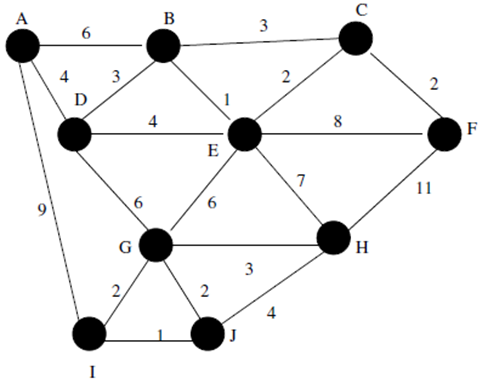

0->1->4->7 , path flow = 1
0->3->4->7 , path flow = 4
0->8->6->7 , path flow = 2
0->8->9->7 , path flow = 1
0->1->2->4->7 , path flow = 2
0->1->2->5->7 , path flow = 1
0->1->3->6->7 , path flow = 1
0->1->3->6->9->7 , path flow = 1
The maximum possible flow is  13


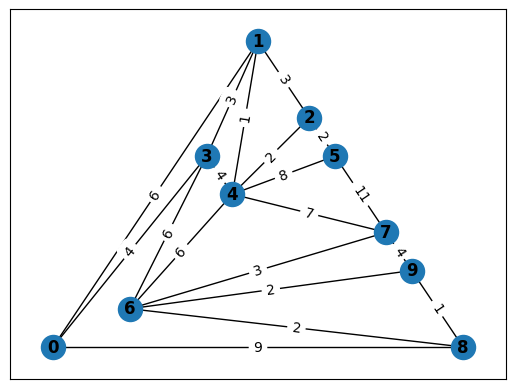

In [ ]:
#          A, B, C, D, E, F, G, H, I, J
graph = [[ 0, 6, 0, 4, 0, 0, 0, 0, 9, 0],  #A
         [ 6, 0, 3, 3, 1, 0, 0, 0, 0, 0],  #B
         [ 0, 3, 0, 0, 2, 2, 0, 0, 0, 0],  #C
         [ 4, 3, 0, 0, 4, 0, 6, 0, 0, 0],  #D
         [ 0, 1, 2, 4, 0, 8, 6, 7, 0, 0],  #E
         [ 0, 0, 2, 0, 8, 0, 0,11, 0, 0],  #F
         [ 0, 0, 0, 6, 6, 0, 0, 3, 2, 2],  #G
         [ 0, 0, 0, 0, 7,11, 3, 0, 0, 4],  #H
         [ 9, 0, 0, 0, 0, 0, 2, 0, 0, 1],  #I
         [ 0, 0, 0, 0, 0, 0, 2, 4, 1, 0]]  #J
draw_graph(graph)
source = 0 #A
sink = 7 #H

print("The maximum possible flow is ", max_flow(graph, source, sink))

# Course starts here !! 

# Backtracking

## Backtracking framework

In [1]:
# Auxilliary Routines for Constructing all Subsets

def is_a_solution(a:list, inputs:list)->bool:
    return len(a) == len(inputs)

def construct_candidate(a:list, inputs:list, c:list):
    #c.append(True)
    #c.append(False)
    c.extend([False, True])

def process_solution(a:list, inputs:list):
    print([inputs[i] for i, x in enumerate(a) if x],"*")
    #print([inputs[i] if x else '-' for i, x in enumerate(a)])
    #print("*")

In [2]:
def do_backtrack(a:list, inputs:list):
    c = []
    if (is_a_solution(a, inputs)):
        process_solution(a, inputs)
    else:
        construct_candidate(a, inputs, c)
        for i in c:
            a.append(i)
            #print([inputs[i] if x else '-' for i, x in enumerate(a)], end='->')
            do_backtrack(a, inputs)
            a.pop()
            #print([inputs[i] if x else '-' for i, x in enumerate(a)], end='->')

find power set 

In [3]:
do_backtrack([],['a','b','c','d'])
print("end")

[] *
['d'] *
['c'] *
['c', 'd'] *
['b'] *
['b', 'd'] *
['b', 'c'] *
['b', 'c', 'd'] *
['a'] *
['a', 'd'] *
['a', 'c'] *
['a', 'c', 'd'] *
['a', 'b'] *
['a', 'b', 'd'] *
['a', 'b', 'c'] *
['a', 'b', 'c', 'd'] *
end


## Auxilliary Routines for Constructing all Permutations

In [4]:
def do_backtrack(a:list, inputs:list):
    c = []
    if (is_a_solution(a, inputs)):
        process_solution(a, inputs)
    else:
        construct_candidate(a, inputs, c)
        for i in c:
            a.append(i)
            do_backtrack(a, inputs)
            a.pop()

In [5]:
def is_a_solution(a:list, inputs:list)->bool:
    return len(a) == len(inputs)

def construct_candidate(a:list, inputs:list, c:list):
    for i in inputs:
        if i not in a:
            c.append(i)

def process_solution(a:list, inputs:list):
    print(a)

do permutation 

In [7]:
do_backtrack([],[1, 2, 4])

[1, 2, 4]
[1, 4, 2]
[2, 1, 4]
[2, 4, 1]
[4, 1, 2]
[4, 2, 1]


In [8]:
do_backtrack([],['a', 'b', 'c', 'd'])

['a', 'b', 'c', 'd']
['a', 'b', 'd', 'c']
['a', 'c', 'b', 'd']
['a', 'c', 'd', 'b']
['a', 'd', 'b', 'c']
['a', 'd', 'c', 'b']
['b', 'a', 'c', 'd']
['b', 'a', 'd', 'c']
['b', 'c', 'a', 'd']
['b', 'c', 'd', 'a']
['b', 'd', 'a', 'c']
['b', 'd', 'c', 'a']
['c', 'a', 'b', 'd']
['c', 'a', 'd', 'b']
['c', 'b', 'a', 'd']
['c', 'b', 'd', 'a']
['c', 'd', 'a', 'b']
['c', 'd', 'b', 'a']
['d', 'a', 'b', 'c']
['d', 'a', 'c', 'b']
['d', 'b', 'a', 'c']
['d', 'b', 'c', 'a']
['d', 'c', 'a', 'b']
['d', 'c', 'b', 'a']


In [9]:
do_backtrack([],[1, 2, 3, 4])

[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]
